In [121]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 7)
# key = {"Milan": 12591813, "Bruselas": 55965974, "Amberes": 7153308, "Cordoba": 12602098,
#        'Lerida': 12602126, 'Madrid': 12578024, 'Valencia': 12602139 , 'Sevilla': 12602104 , 'Toledo': 12602114,
#        'Lisboa': 2346573, 'Tarragona': 12602127 , 'Zaragoza':12602107 , 'Mexico': 0 , 'Alcala':12578024,
#        'Pamplona': 12578026 , 'Coimbra': 12578026, 'Barcelona': 12578026, 'Valladolid': 12578026}

In [122]:
mod_df = pd.read_csv("data/modularity.csv", encoding="utf-8")
mod_map = {3: 1, 2: 2, 5: 3, 9: 4, 4: 5, 8: 6, 0: 7, 1: 8, 7: 9, 6: 10}
mod_df["Modularity Class"] = mod_df["Modularity Class"].apply(lambda x: mod_map[x])

In [123]:
mod = mod_df.groupby("Modularity Class").size()

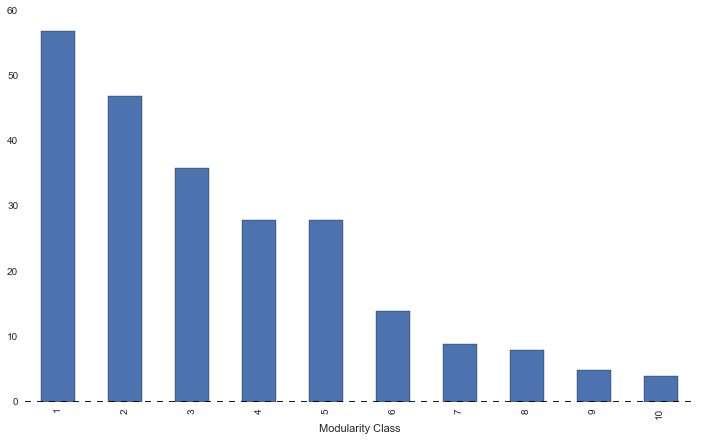

In [124]:
mod.plot(kind="bar")

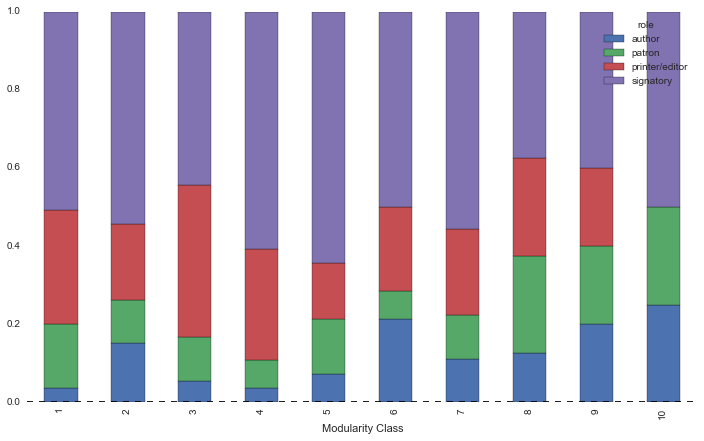

In [125]:
mod_roles = mod_df.groupby(["Modularity Class", "role"]).size()
grouped = mod_roles.groupby(level=0)
divided = mod_roles.divide(grouped.sum())
divided = divided.unstack(level=0).fillna(0)
trans = divided.transpose()
trans.plot(kind="bar", stacked=True)

In [126]:
import json
with open("maps/western_europe_data/provinces.json", "r") as f:
    prov = json.load(f)

In [127]:
# with open("maps/western_europe_data/provinces_with_id.json", "w") as f:
#     json.dump(prov, f)

In [128]:
ids = {}
for x in features:
    props = x["properties"]
    ids[props["woe_id"]] = props["gn_name"]

In [144]:
ids

{-7153342: 'Provincia di Barletta - Andria - Trani',
 -7153339: 'Province of Fermo',
 -99: None,
 2346562: 'Distrito de Aveiro',
 2346563: 'Distrito de Beja',
 2346564: 'Distrito de Braga',
 2346565: 'Distrito de Braganca',
 2346566: 'Distrito de Castelo Branco',
 2346567: 'Distrito de Coimbra',
 2346568: 'Distrito de Evora',
 2346569: 'Distrito de Faro',
 2346570: 'Regiao Autonoma da Madeira',
 2346571: 'Distrito da Guarda',
 2346572: 'Distrito de Leiria',
 2346573: 'Distrito de Lisboa',
 2346574: 'Distrito de Portalegre',
 2346575: 'Distrito do Porto',
 2346576: 'Distrito de Santarem',
 2346577: 'Distrito de Setubal',
 2346578: 'Distrito de Viana do Castelo',
 2346579: 'Distrito de Vila Real',
 2346580: 'Distrito de Viseu',
 7153299: 'Province du Hainaut',
 7153300: 'Province de Liege',
 7153301: 'Provincie Limburg',
 7153302: 'Province du Luxembourg',
 7153303: 'Province de Namur',
 7153304: 'Provincie Oost-Vlaanderen',
 7153305: 'Provincie West-Vlaanderen',
 7153308: 'Provincie Ant

In [139]:
map_key = {"Milan": 12591813, "Bruselas": 22525998, "Amberes": 7153308, "Cordoba": 12602098,
       'Lerida': 12602126, 'Madrid': 12578024, 'Valencia': 12602139 , 'Sevilla': 12602104 , 'Toledo': 12602114,
       'Lisboa': 2346573, 'Tarragona': 12602127 , 'Zaragoza':12602107 , 'Mexico': 0 , 'Alcala':12578024,
       'Pamplona': 12578026 , 'Coimbra': 2346567, 'Barcelona': 12602124, 'Valladolid': 12602122,
       'Malaga': 12602102 , 'Burgos': 12602116, 'Roma': 12591802, 'Lyon': 12597185, 'Venetia': 12591860,
        'Medina': 12602122 , 'Salamanca': 12602119 , 'Paris': 12597155}

In [140]:
mod_places = mod_df.groupby(["Modularity Class", "top_place"]).size()

In [141]:
import csv
def write_csv(d, map_key, name):
    count = {}
    for k, v in d.items():
        id = map_key[k]
        count.setdefault(id, 0)
        count[id] += v
    with open(name, "w") as f:
        writer = csv.writer(f)
        writer.writerow(["id", "count"])
        for k, v in count.items():
            writer.writerow([k, v])

In [142]:
mod_places[1].to_dict()

{'Alcala': 1,
 'Amberes': 4,
 'Barcelona': 4,
 'Bruselas': 2,
 'Madrid': 11,
 'Sevilla': 1,
 'Valencia': 4,
 'Valladolid': 6,
 'Zaragoza': 5}

In [143]:
write_csv(mod_places[1].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass1.csv')

In [145]:
write_csv(mod_places[2].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass2.csv')

In [146]:
write_csv(mod_places[3].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass3.csv')

In [147]:
write_csv(mod_places[4].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass4.csv')

In [148]:
write_csv(mod_places[5].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass5.csv')

In [149]:
write_csv(mod_places[6].to_dict(), map_key, 'maps/western_europe_data/tsv/modclass6.csv')

In [150]:
mod_places

Modularity Class  top_place 
1                 Alcala         1
                  Amberes        4
                  Barcelona      4
                  Bruselas       2
                  Madrid        11
                  Sevilla        1
                  Valencia       4
                  Valladolid     6
                  Zaragoza       5
2                 Alcala         1
                  Barcelona      4
                  Lerida         1
                  Madrid        27
                  Sevilla        2
                  Toledo         1
                  Valladolid     1
3                 Barcelona      5
                  Coimbra        1
                  Lisboa         2
                  Madrid         5
                  Milan          3
                  Tarragona      2
                  Zaragoza      10
4                 Barcelona      6
                  Bruselas       4
                  Lisboa         2
                  Madrid         1
                  Pamplona